# Linear Algebra

A lot of the Data Science methods require some understanding of linear algebra, and in this notebook I will focus on how Python handles matrices, the types that exist, and how to call basic linear algebra tasks.

In [1]:
import numpy as np

## Creating a random matrix and matrix multiplication

In [2]:
A = np.random.randint(0,100,size=(4,4)) # created a random matrix of size 4 by 4
A

array([[47, 23, 70, 96],
       [22, 88, 86, 17],
       [80, 14, 70, 64],
       [43, 37, 17, 41]])

In [3]:
Atranspose = A.T # returns the array, transposed
Atranspose

array([[47, 22, 80, 43],
       [23, 88, 14, 37],
       [70, 86, 70, 17],
       [96, 17, 64, 41]])

In [4]:
A = A*Atranspose # matrix multiplication
A

array([[2209,  506, 5600, 4128],
       [ 506, 7744, 1204,  629],
       [5600, 1204, 4900, 1088],
       [4128,  629, 1088, 1681]])

In [5]:
A[1,3] == A[3,1] 

True

## Solving the linear system Ax=b

In [6]:
rg = np.random.default_rng(1)  # create instance of default random number generator
A = np.random.randint(0,10,size=(4,4)) 
b = rg.random((4))

In [7]:
A

array([[8, 2, 6, 6],
       [0, 0, 9, 7],
       [6, 4, 5, 8],
       [5, 2, 8, 6]])

In [8]:
b

array([0.51182162, 0.9504637 , 0.14415961, 0.94864945])

We have to solve the system of equation below to find x 

3*x0 + 3*x1 + 8*x2 + 2*x3 = 0.51182162

0*x0 + 1*x1 + 5*x2 + 7*x3 = 0.9504637

9*x0 + 5*x1 + 9*x2 + 2*x3 = 0.14415961

8*x0 + 9*x1 + 9*x2 + 6*x3 = 0.94864945

In [9]:
x = np.linalg.solve(A, b)
x

array([-0.00541732,  0.05048531,  0.21028793, -0.13458967])

In [10]:
from numpy import linalg as LA
LA.norm(A @ x-b)

3.3422138886441676e-16

In [11]:
type(A)

numpy.ndarray

In [12]:
type(x)

numpy.ndarray

In [13]:
type(b)

numpy.ndarray

## Factorizations

A common tool used in Linear Algebra is matrix factorizations. These factorizations are often used to solve linear systems like Ax=b, and as we will see later in this tutorial... Ax=b comes up in a lot of Data Science problems

### LU Factorization

L*U = P*A

In [14]:
import pprint
import scipy
import scipy.linalg  # SciPy Linear Algebra Library

In [15]:
#rg = np.random.default_rng(1)
A = rg.random((10,10))
P, L, U = scipy.linalg.lu(A)

In [16]:
print("A:")
print(A)

print("P:")
print(P)

print("L:")
print(L)

print("U:")
print(U)

A:
[[0.31183145 0.42332645 0.82770259 0.40919914 0.54959369 0.02755911
  0.75351311 0.53814331 0.32973172 0.7884287 ]
 [0.30319483 0.45349789 0.1340417  0.40311299 0.20345524 0.26231334
  0.75036467 0.28040876 0.48519097 0.9807372 ]
 [0.96165719 0.72478994 0.54122686 0.2768912  0.16065201 0.96992541
  0.51606859 0.11586561 0.62348976 0.77668311]
 [0.6130033  0.9172977  0.03959288 0.52858926 0.45933588 0.06234958
  0.64132817 0.85263284 0.59294102 0.26009745]
 [0.83988152 0.50949588 0.51088888 0.75303021 0.14792204 0.81962672
  0.68328691 0.78709694 0.19161626 0.80236416]
 [0.19132393 0.08155262 0.85522697 0.8612835  0.8765371  0.47190972
  0.27404839 0.00709183 0.6457209  0.71990938]
 [0.83556922 0.28187783 0.21521817 0.63933138 0.80505483 0.96367087
  0.15052483 0.48221239 0.89471586 0.42271691]
 [0.58950206 0.02449068 0.67345989 0.91908862 0.82682533 0.88552027
  0.66035538 0.24555227 0.768517   0.21167474]
 [0.83127483 0.06271792 0.82548781 0.16450727 0.375147   0.31673817
  0.69133

In [17]:
LA.norm(L@U - P@A)

3.489770122879551

### QR Factorization

Q*R = A

In [18]:
A = rg.random((10,10))
Q, R = scipy.linalg.qr(A)

In [19]:
print("A:")
print(A)

print("Q:")
print(Q)

print("R:")
print(R)

A:
[[0.81027435 0.34179472 0.54366929 0.19629689 0.99614119 0.24321546
  0.25686747 0.07319007 0.25780312 0.76312853]
 [0.69789357 0.12867321 0.3762385  0.42092139 0.66498425 0.45592896
  0.58651833 0.8396846  0.72647361 0.36500726]
 [0.44839631 0.36769957 0.10973466 0.20324154 0.28380649 0.3141339
  0.31304786 0.57669972 0.97168998 0.77466413]
 [0.79113395 0.7592685  0.59698773 0.91769226 0.68963016 0.50035643
  0.07708381 0.48844923 0.212831   0.1326963 ]
 [0.50606492 0.78508529 0.29500644 0.76877176 0.52562952 0.14904802
  0.96496774 0.40163622 0.29523426 0.84699837]
 [0.12446033 0.73359046 0.18782474 0.39249178 0.23189988 0.84122799
  0.39007455 0.97469281 0.62526148 0.69362283]
 [0.52152512 0.3089682  0.39555642 0.94093419 0.2012032  0.9882189
  0.75830586 0.35978693 0.64151359 0.38098154]
 [0.38149293 0.50380295 0.01672282 0.49357156 0.97159841 0.28546523
  0.74821796 0.44278889 0.20928104 0.90500257]
 [0.01682728 0.30350893 0.99902588 0.2621468  0.84904452 0.60568315
  0.8060357

In [20]:
LA.norm(Q@R - A)

1.6934633213482853e-15

### Create diagonal matrix 

We will use the diag() function.

Start with creating a 1-D array (or a vector) v. Then create a matrix with v on the main diagonal with the diag() function.

In [21]:
v = [3, 2, 5]

In [22]:
D = np.diag(v)
D

array([[3, 0, 0],
       [0, 2, 0],
       [0, 0, 5]])

### Extract diagonal from matrix

Let’s create some 3×3 matrix V. Then we can extract its main diagonal with the diag() function.

In [23]:
V = np.array([[3, 1, 4],
              [0, 2, 7],
              [8, 9, 5]])

In [24]:
d = np.diag(V)
d

array([3, 2, 5])

## Sparse Linear Algebra

Compressed Sparse Column matrix

This can be instantiated in several ways:

csc_matrix(D)
with a dense matrix or rank-2 ndarray D

csc_matrix(S)
with another sparse matrix S (equivalent to S.tocsc())

csc_matrix((M, N), [dtype])
to construct an empty matrix with shape (M, N) dtype is optional, defaulting to dtype=’d’.

csc_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k].

csc_matrix((data, indices, indptr), [shape=(M, N)])
is the standard CSC representation where the row indices for column i are stored in indices[indptr[i]:indptr[i+1]] and their corresponding values are stored in data[indptr[i]:indptr[i+1]]. If the shape parameter is not supplied, the matrix dimensions are inferred from the index arrays.

In [25]:
import scipy.sparse as sparse
from scipy.sparse import csc_matrix

In [26]:
csc_matrix((3, 4), dtype=np.int8).toarray()
np.array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [27]:
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]], dtype=int32)

In [28]:
indptr = np.array([0, 2, 3, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, indices, indptr), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]])

SPARSE LİNEAR ALGEBRA 

In [29]:
import scipy.sparse.linalg as sla

In [30]:
import matplotlib.image as image
from matplotlib import pyplot

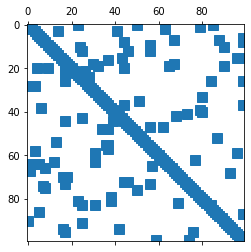

In [31]:
n = 100
A = sparse.random(n, n, 0.01) + sparse.eye(n)
pyplot.spy(A)
pyplot.show()

In [32]:
print(A)

  (0, 0)	1.0
  (0, 23)	0.6080769050520318
  (0, 50)	0.43077919057628233
  (0, 85)	0.16277684765400835
  (1, 1)	1.0
  (1, 79)	0.23901483536849755
  (2, 2)	1.0
  (2, 63)	0.10411237947545393
  (3, 3)	1.0
  (3, 14)	0.40947058123287017
  (3, 41)	0.47309858618164
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (6, 99)	0.6342060348501442
  (7, 7)	1.0
  (7, 67)	0.8050030785245231
  (7, 88)	0.9226163169820725
  (8, 8)	1.0
  (8, 44)	0.7934970197487307
  (8, 99)	0.26247244956879057
  (9, 9)	1.0
  (9, 56)	0.9603739510321844
  (10, 10)	1.0
  (10, 24)	0.6250713819453521
  :	:
  (85, 85)	1.0
  (86, 5)	0.8827592553023036
  (86, 86)	1.0
  (87, 87)	1.0
  (87, 99)	0.18774474052269963
  (88, 88)	1.0
  (89, 89)	1.0
  (90, 0)	0.0008752196712814575
  (90, 90)	1.0
  (91, 25)	0.05891011410939506
  (91, 91)	1.0
  (92, 92)	1.0
  (93, 93)	1.0
  (94, 16)	0.1402630639012148
  (94, 42)	0.9820574429848673
  (94, 94)	1.0
  (95, 17)	0.5198813334084221
  (95, 76)	0.5290048373227281
  (95, 95)	1.0
  (96, 96)	1.0
  (97, 97)	1.0


In [33]:
A = A.tocsc() # need to convert to CSC form first
LU = sla.splu(A)
LU

In [34]:
x = np.random.randn(n)
b = A @ x

x2 = LU.solve(b)
print(np.linalg.norm(x2 - x))

1.2677161666382903e-15


## Images as matrices

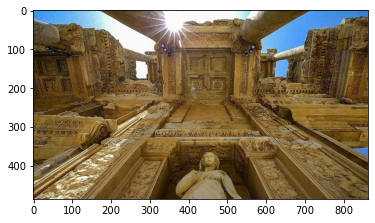

In [35]:
img=image.imread('ephesus.jpg')
pyplot.imshow(img)

In [36]:
img

array([[[ 34, 116, 192],
        [ 48, 130, 206],
        [ 30, 112, 188],
        ...,
        [ 33, 106, 185],
        [ 30, 103, 182],
        [ 38, 111, 190]],

       [[ 56, 138, 214],
        [ 68, 150, 226],
        [ 57, 139, 215],
        ...,
        [ 55, 128, 207],
        [ 53, 126, 205],
        [ 62, 135, 214]],

       [[ 56, 137, 216],
        [ 66, 149, 227],
        [ 62, 145, 223],
        ...,
        [ 51, 124, 203],
        [ 49, 122, 201],
        [ 58, 131, 210]],

       ...,

       [[ 63,  41,  20],
        [ 54,  32,  11],
        [ 25,   4,   0],
        ...,
        [116,  95,  42],
        [ 99,  78,  25],
        [ 72,  51,   0]],

       [[ 30,   7,   0],
        [ 35,  14,   0],
        [ 54,  33,  14],
        ...,
        [112,  91,  38],
        [103,  82,  29],
        [ 85,  64,  11]],

       [[ 59,  37,  24],
        [ 43,  21,   7],
        [163, 141, 127],
        ...,
        [ 92,  71,  18],
        [ 98,  77,  24],
        [ 89,  68,  15]]

In [37]:
from PIL import Image

In [38]:
im = np.array(Image.open('ephesus.jpg').convert('L').resize((400,400)))

In [39]:
im

array([[109, 111, 118, ..., 100, 100,  98],
       [128, 131, 132, ..., 115, 116, 116],
       [126, 130, 117, ..., 112, 112, 111],
       ...,
       [ 34,  27, 108, ...,  90,  86,  65],
       [ 19,  80, 140, ...,  97,  97,  73],
       [ 41, 140, 182, ...,  79,  77,  73]], dtype=uint8)

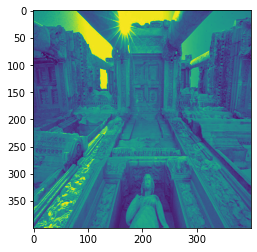

In [40]:
pyplot.imshow(im)

In [41]:
type(im)

numpy.ndarray

In [42]:
u, s, vh = np.linalg.svd(im, full_matrices=True)

In [43]:
print("u:")
print(u)

print("s:")
print(s)

print("vh:")
print(vh)

u:
[[-0.06511385  0.10001263 -0.10235243 ... -0.12831636  0.17858048
   0.23042849]
 [-0.0757149   0.1186352  -0.1161215  ... -0.07901819 -0.11369707
  -0.21113537]
 [-0.07380668  0.11864824 -0.11536413 ...  0.05536404  0.03033877
   0.040963  ]
 ...
 [-0.04556892  0.03888434  0.06960284 ...  0.04028374 -0.04509086
  -0.04162183]
 [-0.04599957  0.0373287   0.06642244 ... -0.03155925 -0.00264519
   0.04375782]
 [-0.04475034  0.03323908  0.05672273 ...  0.02002033  0.00568554
  -0.00553066]]
s:
[4.17484066e+04 8.20783964e+03 6.50849181e+03 5.48990844e+03
 3.87644284e+03 3.44306298e+03 2.93498229e+03 2.46520844e+03
 2.17093063e+03 2.06546106e+03 1.95987589e+03 1.76301169e+03
 1.70235652e+03 1.63234677e+03 1.58714372e+03 1.49305517e+03
 1.49017855e+03 1.39100484e+03 1.37571866e+03 1.30733756e+03
 1.28963153e+03 1.25553548e+03 1.22687761e+03 1.19507128e+03
 1.15591776e+03 1.08501144e+03 1.04506815e+03 1.02957272e+03
 1.01754389e+03 9.98324746e+02 9.90240315e+02 9.58639441e+02
 9.48488083e+0

In [44]:
LA.norm( u @ np.diag(s) @ vh - im)

2.8655030156734617e-10